In [72]:
import pandas as pd
df = pd.read_csv("konsumprisindeks.csv", sep=";", decimal=",")
df.head()

,Unnamed: 0,Årsgj.snitt2,Jan,Feb,Mar,Apr,Mai,Jun,Jul,Aug,Sep,Okt,Nov,Des
0,2022,NaN,117.8,119.1,119.8,121.2,121.5,122.6,124.2,123.9,125.6,NaN,NaN,NaN
1,2021,116.1,114.1,114.9,114.6,115.0,114.9,115.3,116.3,116.3,117.5,117.2,118.1,118.9
2,2020,112.2,111.3,111.2,111.2,111.7,111.9,112.1,112.9,112.5,112.9,113.2,112.4,112.9
3,2019,110.8,109.3,110.2,110.4,110.8,110.5,110.6,111.4,110.6,111.1,111.3,111.6,111.3
4,2018,108.4,106.0,107.0,107.3,107.7,107.8,108.5,109.3,108.9,109.5,109.3,109.8,109.8


In [73]:
df = df.rename(columns={"Unnamed: 0": "Ar", "Årsgj.snitt2": "Gjennomsnitt"})
df.head()

,Ar,Gjennomsnitt,Jan,Feb,Mar,Apr,Mai,Jun,Jul,Aug,Sep,Okt,Nov,Des
0,2022,NaN,117.8,119.1,119.8,121.2,121.5,122.6,124.2,123.9,125.6,NaN,NaN,NaN
1,2021,116.1,114.1,114.9,114.6,115.0,114.9,115.3,116.3,116.3,117.5,117.2,118.1,118.9
2,2020,112.2,111.3,111.2,111.2,111.7,111.9,112.1,112.9,112.5,112.9,113.2,112.4,112.9
3,2019,110.8,109.3,110.2,110.4,110.8,110.5,110.6,111.4,110.6,111.1,111.3,111.6,111.3
4,2018,108.4,106.0,107.0,107.3,107.7,107.8,108.5,109.3,108.9,109.5,109.3,109.8,109.8


In [74]:
df.columns

Index(['Ar', 'Gjennomsnitt', 'Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul',
       'Aug', 'Sep', 'Okt', 'Nov', 'Des'],
      dtype='object')

In [75]:
maneder = ['Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul',
       'Aug', 'Sep', 'Okt', 'Nov', 'Des']
             
df_min = df.loc[df[maneder].idxmin()].drop_duplicates(['Ar'], keep='first')
df_min.index = df_min.Ar
df_min = df_min[maneder].head(2)
df_min

,Jan,Feb,Mar,Apr,Mai,Jun,Jul,Aug,Sep,Okt,Nov,Des
Ar,,,,,,,,,,,,
1934,2.7,2.7,2.7,2.7,2.7,2.7,2.8,2.8,2.8,2.8,2.8,2.8
1933,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.8,2.7,2.7,2.7,2.7


In [76]:
df_maks = df.loc[df[maneder].idxmax()].drop_duplicates(['Ar'], keep='first')
df_maks.index = df_maks.Ar
df_maks = df_maks[maneder].head(1)
df_maks

,Jan,Feb,Mar,Apr,Mai,Jun,Jul,Aug,Sep,Okt,Nov,Des
Ar,,,,,,,,,,,,
2022,117.8,119.1,119.8,121.2,121.5,122.6,124.2,123.9,125.6,NaN,NaN,NaN


In [77]:
maks = df[maneder].max().max()
minn = df[maneder].min().min()

def apply_color(v):
    if v  == minn:
        return "background-color: green"
    if v == maks:
         return "background-color: red"
    else:
        return "color: white"

df_min = df_min.drop(columns=["Aug"])
df_min.style.applymap(apply_color)


,Jan,Feb,Mar,Apr,Mai,Jun,Jul,Sep,Okt,Nov,Des
Ar,,,,,,,,,,,
1934,2.700000,2.700000,2.700000,2.700000,2.700000,2.700000,2.800000,2.800000,2.800000,2.800000,2.800000
1933,2.700000,2.700000,2.700000,2.700000,2.700000,2.700000,2.700000,2.700000,2.700000,2.700000,2.700000


In [78]:
df_maks = df_maks[["Sep"]]
df_maks.style.applymap(apply_color)

,Sep
Ar,
2022,125.600000


In [79]:
df['Diff'] = (df.Jan-df.Des).abs()
df.Diff.max()

4.800000000000011

In [80]:
diff = df.loc[df.Diff == df.Diff.max()]
diff[['Ar', 'Jan', 'Des', 'Diff']]

,Ar,Jan,Des,Diff
1,2021,114.1,118.9,4.8


In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['ggplot'])
sns.set_palette("deep", 10)

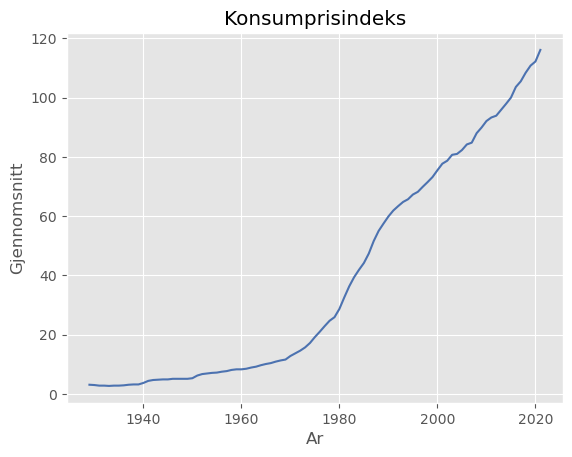

In [82]:
plt.title("Konsumprisindeks")
sns.lineplot(x="Ar", 
            y="Gjennomsnitt",
            data=df)
plt.show()

In [83]:
df_2022 = df.head(1).dropna(axis=1)
df_2022 = df_2022.drop(columns=["Ar"])
df_2022

,Jan,Feb,Mar,Apr,Mai,Jun,Jul,Aug,Sep
0,117.8,119.1,119.8,121.2,121.5,122.6,124.2,123.9,125.6


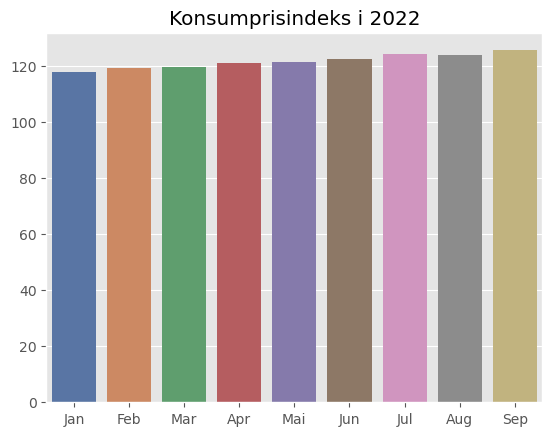

In [84]:
plt.title("Konsumprisindeks i 2022")
sns.barplot(x = df_2022.columns,y=df_2022.values[0])
plt.show()

In [85]:
df.filter(items=[88], axis=0)

,Ar,Gjennomsnitt,Jan,Feb,Mar,Apr,Mai,Jun,Jul,Aug,Sep,Okt,Nov,Des,Diff
88,1934,2.8,2.7,2.7,2.7,2.7,2.7,2.7,2.8,2.8,2.8,2.8,2.8,2.8,0.1


In [86]:
titanic = sns.load_dataset("titanic")

In [87]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [88]:
tips = sns.load_dataset("tips")
tips["percentage"] = round(tips.tip/tips.total_bill, 4)
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'percentage'],
      dtype='object')

In [89]:
tips = tips[['total_bill', 'tip', 'percentage', 'sex', 'smoker', 'day', 'time', 'size']]
tips

,total_bill,tip,percentage,sex,smoker,day,time,size
0,16.99,1.01,0.0594,Female,No,Sun,Dinner,2
1,10.34,1.66,0.1605,Male,No,Sun,Dinner,3
2,21.01,3.50,0.1666,Male,No,Sun,Dinner,3
3,23.68,3.31,0.1398,Male,No,Sun,Dinner,2
4,24.59,3.61,0.1468,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,29.03,5.92,0.2039,Male,No,Sat,Dinner,3
240,27.18,2.00,0.0736,Female,Yes,Sat,Dinner,2
241,22.67,2.00,0.0882,Male,Yes,Sat,Dinner,2
242,17.82,1.75,0.0982,Male,No,Sat,Dinner,2


In [90]:
tips.groupby('sex').mean('percentage')

,total_bill,tip,percentage,size
sex,,,,
Male,20.744076,3.089618,0.157647,2.630573
Female,18.056897,2.833448,0.166483,2.459770


In [91]:
tips.groupby('smoker').mean('percentage')

,total_bill,tip,percentage,size
smoker,,,,
Yes,20.756344,3.008710,0.163191,2.408602
No,19.188278,2.991854,0.159323,2.668874


In [92]:
tips.groupby('size').mean('percentage')

,total_bill,tip,percentage
size,,,
1,7.242500,1.437500,0.217275
2,16.448013,2.582308,0.165714
3,23.277632,3.393158,0.152147
4,28.613514,4.135405,0.145949
5,30.068000,4.028000,0.141520
6,34.830000,5.225000,0.156200


In [93]:
tips_one = tips[tips['size'] == 2]
tips_one.groupby('sex').mean()

,total_bill,tip,percentage,size
sex,,,,
Male,17.104082,2.614184,0.162690,2.0
Female,15.339483,2.528448,0.170824,2.0


In [53]:
tips.percentage.max()

0.7103

In [54]:
tips.loc[tips['percentage'].idxmax()]

total_bill      7.25
tip             5.15
percentage    0.7103
sex             Male
smoker           Yes
day              Sun
time          Dinner
size               2
Name: 172, dtype: object

In [57]:
tips.loc[tips['percentage'].idxmin()]

total_bill     32.83
tip             1.17
percentage    0.0356
sex             Male
smoker           Yes
day              Sat
time          Dinner
size               2
Name: 237, dtype: object

In [56]:
tips.describe()

,total_bill,tip,percentage,size
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.160798,2.569672
std,8.902412,1.383638,0.061070,0.951100
min,3.070000,1.000000,0.035600,1.000000
25%,13.347500,2.000000,0.129100,2.000000
50%,17.795000,2.900000,0.154750,2.000000
75%,24.127500,3.562500,0.191475,3.000000
max,50.810000,10.000000,0.710300,6.000000


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['ggplot'])
sns.set_palette("deep", 10)

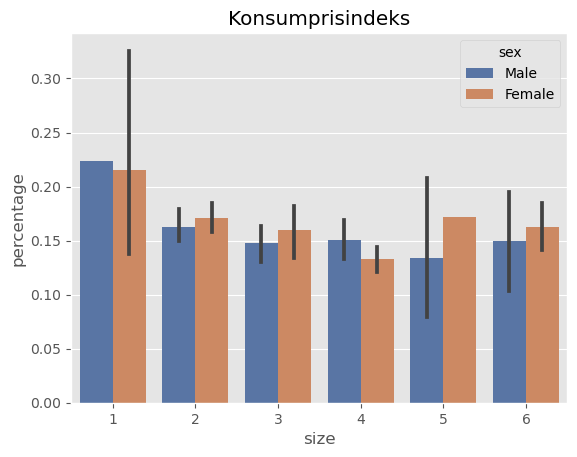

In [64]:
plt.title("Konsumprisindeks")
sns.barplot(x="size", 
            y="percentage",
            hue="smoker",
            data=tips)
plt.show()